In [1]:

import tensorflow as tf

In [34]:
import matplotlib.pyplot as plt

In [116]:
import pandas as pd

In [2]:
tf.enable_eager_execution()


In [3]:
tf.executing_eagerly() 

True

In [4]:
x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))


hello, [[4.]]


In [6]:
import numpy as np

In [8]:
a = np.array(
[[1, 2],
 [3, 4]])

In [9]:
b = a+1

In [10]:
b


array([[2, 3],
       [4, 5]])

In [11]:
a*b

array([[ 2,  6],
       [12, 20]])

In [15]:
type(tf.convert_to_tensor(2).numpy())

numpy.int32

In [17]:
# load  my model...
restored_model4 = tf.keras.models.load_model('models/2019-05-19T001217-UTC-model-4.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [19]:
import pickle

In [22]:
with open('models/2019-05-19T001217-UTC-outdata.pkl', 'rb') as fd: outdata = pickle.load(fd)

In [23]:
outdata.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test', 'y_train_original', 'y_test_original', 'traindf', 'testdf', 'metadata'])

In [191]:
outdata['metadata']

{'output': {'shapes': {'x_train': (446110, 256, 1),
   'y_train': (446110, 4),
   'x_test': (551326, 256, 1),
   'y_test': (551326, 4),
   'y_train_original': (446110,),
   'y_test_original': (551326,),
   'traindf': (447652, 7),
   'testdf': (552868, 7)},
  "Counter(outdata['y_train_original'])": {'A': 234352,
   'C': 180851,
   'D': 23218,
   'B': 7689},
  "Counter(outdata['y_test_original'])": {'C': 183718,
   'A': 325198,
   'D': 27039,
   'B': 15371}},
 'input': {'kwargs': {'crews': {'training': [1], 'test': [2]},
   'percent_of_data': 1,
   'sequence_window': 256,
   'feature_cols': ['r']}},
 'data_ts': '2019-05-18 20:18:33 UTC'}

In [30]:
# Look at my output data here real quick..
print(outdata['y_train'][:5,:])

# so, I already checked this prior to the demultiplexing, but lets compare the sums ,
# using this demultiplexed form..
ytrain_sums = [[j, np.sum(outdata['y_train'][:,j])] for j in [0,1,2,3]]
print(ytrain_sums)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0, 234352.0], [1, 7689.0], [2, 180851.0], [3, 23218.0]]


In [33]:
# Ok cool. so per the above, we do have representation in the de-multiplexed data as well.
print ( outdata['y_train'].shape, outdata['x_train'].shape)

(446110, 4) (446110, 256, 1)


In [39]:
outdata['x_train'][0][:10,0]

array([-0.9586470767805308, -0.9586470767805308, -0.9586470767805308,
       -0.9586470767805308, -0.9586470767805308, -0.9586470767805308,
       -0.9586470767805308, -0.9586470767805308, -0.9575023692116296,
       -0.9575023692116296], dtype=object)

In [56]:
gg = (i for i in np.arange(1, 446110, 1) if outdata['y_train'][i][1] == 1)
gg.__next__()


204490

In [57]:
gg.__next__()


204491

In [59]:
def fetch_some_examples(array, which_col):
    gg = (i for i in np.arange(1, 446110, 1) if array['y_train'][i][which_col] == 1)
    
    return [gg.__next__() for i in range(4)]

examples = {j: fetch_some_examples(outdata, j)
               for j in range(4)}

In [63]:
print(examples)
print([[j, outdata['y_train'][examples[j][0]]] 
                             for j in range(4)])

{0: [1, 2, 3, 4], 1: [204490, 204491, 204492, 204493], 2: [1457, 1458, 1459, 1460], 3: [99781, 99782, 99783, 99784]}
[[0, array([1., 0., 0., 0.], dtype=float32)], [1, array([0., 1., 0., 0.], dtype=float32)], [2, array([0., 0., 1., 0.], dtype=float32)], [3, array([0., 0., 0., 1.], dtype=float32)]]


In [67]:
import itertools


(256,) (256,)


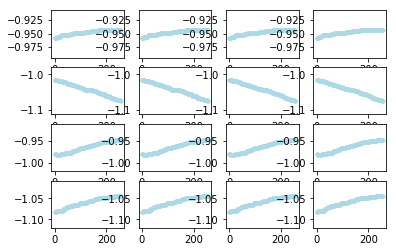

In [70]:
# Umm, and I want to look at a couple of these..
# Going to print some random plots of my sequence data here, for each category.
#
# row 1: "A" or "Baseline"; row2: "B" or "Startle/Surprise"; 
# row3: "C" or "Channelized Attention" ; 
# row4: "D"  or "Diverted Attention"

x = np.arange(0, 256, 1)
print(x.shape, y.shape)
fig = plt.figure() # x, y, )

for i,j in itertools.product(range(4), range(4)):
    ix = 1 + i*4 + j
    
    sample_row = examples[i][j]

    ax = fig.add_subplot(4, 4, ix)
    y = outdata['x_train'][sample_row][:,0]
    ax.scatter(x, y, color='lightblue', marker='.')


In [ ]:
# I dont know if there is enough in here to visually discern
# What does a respiration look like for each category, 
# I guess it would really come down to the slope.
# 
# So above, I do see that the last row's slope "Diverted Attention" does happen to look
#   steeper than the first row's slope "Baseline"

In [82]:
restored_model4.predict(outdata['x_test'][:10, :, :])

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]], dtype=float32)

In [79]:
outdata['x_train'][:10, :, 0].shape

(10, 256)

In [87]:
# restored_model4.trainable_variables

In [84]:
# forking from here:
# https://github.com/keras-team/keras/blob/master/keras/backend/tensorflow_backend.py#L3527
def unbalanced_categorical_crossentropy(target, output, from_logits=False, axis=-1):
    """Categorical crossentropy between an output tensor and a target tensor.
    # Arguments
        target: A tensor of the same shape as `output`.
        output: A tensor resulting from a softmax
            (unless `from_logits` is True, in which
            case `output` is expected to be the logits).
        from_logits: Boolean, whether `output` is the
            result of a softmax, or is a tensor of logits.
        axis: Int specifying the channels axis. `axis=-1`
            corresponds to data format `channels_last`,
            and `axis=1` corresponds to data format
            `channels_first`.
    # Returns
        Output tensor.
    # Raises
        ValueError: if `axis` is neither -1 nor one of
            the axes of `output`.
    """
    output_dimensions = list(range(len(output.get_shape())))
    if axis != -1 and axis not in output_dimensions:
        raise ValueError(
            '{}{}{}'.format(
                'Unexpected channels axis {}. '.format(axis),
                'Expected to be -1 or one of the axes of `output`, ',
                'which has {} dimensions.'.format(len(output.get_shape()))))
        
    # Pre-computed Hard-coded class_weights...
    class_weights = {0: 0.5898470233582309,
                     1: 0.027880056445732652,
                     2: 0.33322934162364914,
                     3: 0.0490435785723873}
    # Note: tf.nn.softmax_cross_entropy_with_logits
    # expects logits, Keras expects probabilities.
    if not from_logits:
        # scale preds so that the class probas of each sample sum to 1
        output /= tf.reduce_sum(output, axis, True)
        # manual computation of crossentropy
        _epsilon = _to_tensor(epsilon(), output.dtype.base_dtype)
        output = tf.clip_by_value(output, _epsilon, 1. - _epsilon)
        return - tf.reduce_sum(target * tf.log(output), axis)
    else:
        error = tf.nn.softmax_cross_entropy_with_logits(labels=target,
                                                       logits=output)
    
        # Scale by class
        class_weight = 
        return  tf.mul(error, class_weight)

SyntaxError: invalid syntax (<ipython-input-84-04fabbb7ae4b>, line 49)

In [179]:
# 
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64,  dropout=0.2, recurrent_dropout=0.2,
                input_shape=(None, 1)
              ),
    # 4 because 'A', 'B', 'C', 'D'.
    tf.keras.layers.Dense(4)
])



In [173]:
trainsmall.shape

TensorShape([Dimension(100), Dimension(256), Dimension(1)])

In [177]:
outdata['x_train'].shape

(446110, 256, 1)

In [147]:
trainsmall = tf.convert_to_tensor(outdata['x_train'][:100, :, :],  dtype=tf.float32)

# Build single column labels instead, 
labelsmall = tf.convert_to_tensor(outdata['y_train'][:100, :])

dataset = tf.data.Dataset.from_tensor_slices(
(trainsmall, labelsmall))

In [154]:
dataset

<DatasetV1Adapter shapes: ((256, 1), (4,)), types: (tf.float32, tf.float32)>

In [184]:
for images,labels in dataset.take(1):
  print("Logits: ", model(trainsmall[:1]).numpy())


Logits:  [[-0.0121733  -0.0003184   0.13217376 -0.1131559 ]]


In [188]:
labels.shape

TensorShape([Dimension(2), Dimension(4)])

In [187]:
optimizer = tf.train.AdamOptimizer()

loss_history = []
dataset_batches = dataset.batch(2)

for (batch, (invec, labels)) in enumerate(dataset_batches.take(100)):

    with tf.GradientTape() as tape:
        logits = model(invec, training=True)
        loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

    loss_history.append(loss_value.numpy())
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                            global_step=tf.train.get_or_create_global_step())




InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 4 [Op:Squeeze]

In [193]:
labels

<tf.Tensor: id=164487, shape=(2, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [194]:
logits

<tf.Tensor: id=196783, shape=(2, 4), dtype=float32, numpy=
array([[-0.0039134 ,  0.0085199 ,  0.13216054, -0.1363472 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)>

In [198]:
tf.losses.sparse_softmax_cross_entropy(labels, logits, weights=[0.25, 0.25, 0.25, 0.25])

InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 4 [Op:Squeeze]

In [ ]:
# okay looked at https://stackoverflow.com/questions/49083984/valueerror-can-not-squeeze-dim1-expected-a-dimension-of-1-got-3-for-sparse
# and dang their explanation is very helpful. The documentation actually was not super duper
# straight forward.

In [219]:
trainsmall = tf.convert_to_tensor(outdata['x_train'][:10000, :, :],  dtype=tf.float32)

# Build single column labels instead, 
labelsmall = tf.convert_to_tensor(np.argmax(outdata['y_train'][:10000, :], axis=1))

dataset = tf.data.Dataset.from_tensor_slices(
(trainsmall, labelsmall))

dataset_batches = dataset.batch(2)


In [216]:
loss1 = tf.losses.sparse_softmax_cross_entropy(labelsmall, trainsmall ) # ,  weights=[0.25, 0.25, 0.25, 0.25])

In [214]:
loss1.numpy()

5.5516644

In [220]:
optimizer = tf.train.AdamOptimizer()

loss_history = []

for (batch, (invec, labels)) in enumerate(dataset_batches.take(100)):

    with tf.GradientTape() as tape:
        logits = model(invec, training=True)
        loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

    loss_history.append(loss_value.numpy())
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                            global_step=tf.train.get_or_create_global_step())




In [ ]:
labelsmall

In [201]:
print([x for x in zip(outdata['y_train'][:10, :], np.argmax(outdata['y_train'][:10, :], axis=1))])
# np.argmax(outdata['y_train'][:10, :], axis=1)

[(array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0), (array([1., 0., 0., 0.], dtype=float32), 0)]


In [202]:
from collections import Counter

In [217]:
print(Counter(np.argmax(outdata['y_train'][:, :], axis=1)))
print(Counter(np.argmax(outdata['y_train'][:10000, :], axis=1)))

Counter({0: 234352, 2: 180851, 3: 23218, 1: 7689})
Counter({2: 8543, 0: 1457})


Text(0, 0.5, 'Loss [entropy]')

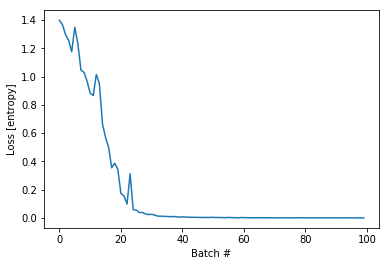

In [222]:

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')


In [244]:
# okay now try again but withweights and fuller covering data.

# find more examples 

def fetch_some_examples(arrays, which_col, n=10):
    gg = (i for i in np.arange(1, 446110, 1) if arrays['y_train'][i][which_col] == 1)
    
    return [gg.__next__() for i in range(n)]


def build_dataset(arrays, target_indices):
    traindata = tf.convert_to_tensor(
            arrays['x_train'][target_indices, :, :],  dtype=tf.float32)

    
    labeldata = tf.convert_to_tensor(
        np.argmax(arrays['y_train'][target_indices, :], axis=1))
    
    # Just try equal weights for now
    equal_weight = 1/(len(target_indices))
    weights = tf.convert_to_tensor(np.array(
        [equal_weight for i in range(len(target_indices))]
    
    ))
    
    dataset = tf.data.Dataset.from_tensor_slices(
        (traindata, labeldata, weights))

    dataset_batches = dataset.batch(100)
    return dataset_batches


In [230]:
# So now I can grab data like so: for class=3 for instance,
outdata['y_train'][examples[3], :]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [249]:
target_indices = examples[0] + examples[1] + examples[2] + examples[3]
print(len(target_indices))

%time examples = {j: fetch_some_examples(outdata, j, n=1000) for j in range(4)}

%time dataset_batches = build_dataset(outdata, target_indices)

print(dataset_batches)

4000
CPU times: user 1.39 s, sys: 7.09 ms, total: 1.4 s
Wall time: 1.4 s
CPU times: user 30.9 ms, sys: 8.18 ms, total: 39.1 ms
Wall time: 53 ms
<DatasetV1Adapter shapes: ((?, 256, 1), (?,), (?,)), types: (tf.float32, tf.int64, tf.float64)>


In [250]:
def do_train(model, dataset_batches):
    optimizer = tf.train.AdamOptimizer()

    loss_history = []

    for (batch, (invec, labels, weights)) in enumerate(dataset_batches.take(100)):

        with tf.GradientTape() as tape:
            logits = model(invec, training=True)
            loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits, weights=weights)

        loss_history.append(loss_value.numpy())
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables),
                                global_step=tf.train.get_or_create_global_step())

    return loss_history


In [251]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64,  dropout=0.2, recurrent_dropout=0.2,
                input_shape=(None, 1)
              ),
    # 4 because 'A', 'B', 'C', 'D'.
    tf.keras.layers.Dense(4)
])

In [252]:
%time loss_history = do_train(model, dataset_batches)

CPU times: user 1min 51s, sys: 8.48 s, total: 1min 59s
Wall time: 2min 2s


In [253]:
1+1

2

Text(0, 0.5, 'Loss [entropy]')

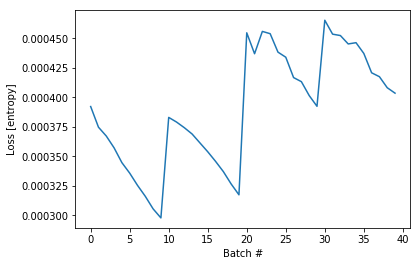

In [254]:
# okay so this time around i started with 4000 sequences, but 1000 of each class
# I am using the weights input as well, although with equal weights.

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')


In [255]:
# Very interesting. So the sawtooth first of all is probably because there are 4 different labels
# back to back.
# Going to run a confusion matrix, just out of curiosity... on the test data...
outdata.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test', 'y_train_original', 'y_test_original', 'traindf', 'testdf', 'metadata'])

In [262]:
outdata['x_test'].shape, outdata['y_test'].shape
preds = model(tf.convert_to_tensor(outdata['x_test'], dtype=tf.float32))

<tf.Tensor: id=11965864, shape=(1, 4), dtype=float32, numpy=
array([[ 0.01078458,  0.01371244, -0.00371432, -0.09065709]],
      dtype=float32)>

In [267]:

test_subset = np.random.choice(np.arange(0, outdata['x_test'].shape[0], 1), 1000, replace=False)

In [270]:
preds = model(tf.convert_to_tensor(outdata['x_test'][test_subset], dtype=tf.float32))

In [272]:
Counter(np.argmax(preds, axis=1))

Counter({2: 502, 0: 180, 1: 318})

In [276]:
expected = tf.convert_to_tensor(np.argmax(outdata['y_test'][test_subset], axis=1))

In [279]:
expected.shape, preds.shape

(TensorShape([Dimension(1000)]), TensorShape([Dimension(1000), Dimension(4)]))

In [280]:
# model-2 confusion matrix...


tf.confusion_matrix( 
    expected,# labels
    np.argmax(preds, axis=1), # predictions
    num_classes=4
)


Instructions for updating:
Use tf.cast instead.


<tf.Tensor: id=11998076, shape=(4, 4), dtype=int32, numpy=
array([[ 82, 213, 291,   0],
       [  8,   7,  12,   0],
       [ 90,  75, 178,   0],
       [  0,  23,  21,   0]], dtype=int32)>

In [ ]:
# Hmm okay this is very interesting. I had never gotten predictions that looked this balanced
# before. Even though many mistakes heh. An interesting result nonetheless.

In [ ]:
####### ----

In [119]:
# Borrowing parts of this func from 
# https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class10_lstm.ipynb
def to_sequences(obs, seq_size, incols=[0], outcols=[1]):
    x = []
    y = []

    for i in range(len(obs)-seq_size-1):
        #print(i)
        window = obs[i:(i+seq_size)][..., 0]
        after_window = obs[i+seq_size, 1] # FIXME :off by 1 error here?
        # window = [[x] for x in window]

        x.append(window)
        y.append(after_window)
        
    xarr = np.array(x)
    yarr = np.array(y)
    return (np.resize(xarr, xarr.shape + (1,)),
            yarr)


In [117]:
df = pd.read_csv('data/sorted_train.csv.part1a')

In [121]:
cols =  ['r', 'event']# ['r_scaled', 'event']
df.crew.unique().tolist()

[1, 2]

In [123]:
query = (df.crew == 1)&(df.seat == 0)&(df.experiment == 'CA')
thisdf = df[query][cols]
whats_proportion_index = lambda x, y: round(x*y)
percent_of_data = 0.01
X_i, Y_i = to_sequences(thisdf.values, seq_size=256)
X = []
X.append(X_i[:
                     whats_proportion_index(
                         X_i.shape[0],
                         percent_of_data)])



In [129]:
query = (df.crew == 1)&(df.seat == 1)&(df.experiment == 'CA')
thisdf = df[query][cols]
whats_proportion_index = lambda x, y: round(x*y)
percent_of_data = 0.01
X_i, Y_i = to_sequences(thisdf.values, seq_size=256)

X.append(X_i[:
                     whats_proportion_index(
                         X_i.shape[0],
                         percent_of_data)])



In [172]:
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])
